In [1]:
"""Plots the loss of the model & performs basic evaluation.
"""

'Plots the loss of the model & performs basic evaluation.\n'

In [2]:
import pathlib
import torch
from typing import List, Union, Tuple
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim as optim
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from data_loader import train_dataloader, test_dataloader
from model import model

In [3]:
def plot_loss(
    model_name: str, train_loss: List[float], valid_loss: List[float]
) -> None:
    """Visualizes the loss data of the trained model.

    Args:
        model_name: Name of the trained model.
        train_loss: Loss data generated during training.
        valid_loss: Loss data generated during validation.
    """
    plt.figure(figsize=(12, 7))
    plt.suptitle(model_name + " loss values")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.plot(train_loss)
    plt.plot(valid_loss)
    plt.legend(["Training Loss", "Validation Loss"])
    plt.show()

In [4]:
def txt_to_list(input_path: Union[pathlib.Path, str]) -> List[str]:
    """Loads a .txt file into a list.
    Args:
        input_path: Input path to the txt file.

    Returns:
        List containing data from the .txt file.
    """
    with open(input_path, "r") as f:
        data = f.read().splitlines()
    
    return data

In [5]:
model_name = 'new_model'

In [6]:
TRAINED_MODEL_PATH = f'./trained_models/{model_name}.pt'
TRAIN_LOSS_PATH = f'./trained_models/{model_name}_training_loss.txt'
VALID_LOSS_PATH = f'./trained_models/{model_name}_validation_loss.txt'

In [7]:
model_name = pathlib.Path(TRAINED_MODEL_PATH).stem
train_loss= txt_to_list(TRAIN_LOSS_PATH)
valid_loss= txt_to_list(VALID_LOSS_PATH)

In [8]:
# Convert str to float & tidy up.
train_loss = [float(el) for el in train_loss]
train_loss = [round(el, 4) for el in train_loss]

valid_loss = [float(el) for el in valid_loss]
valid_loss = [round(el, 4) for el in valid_loss]

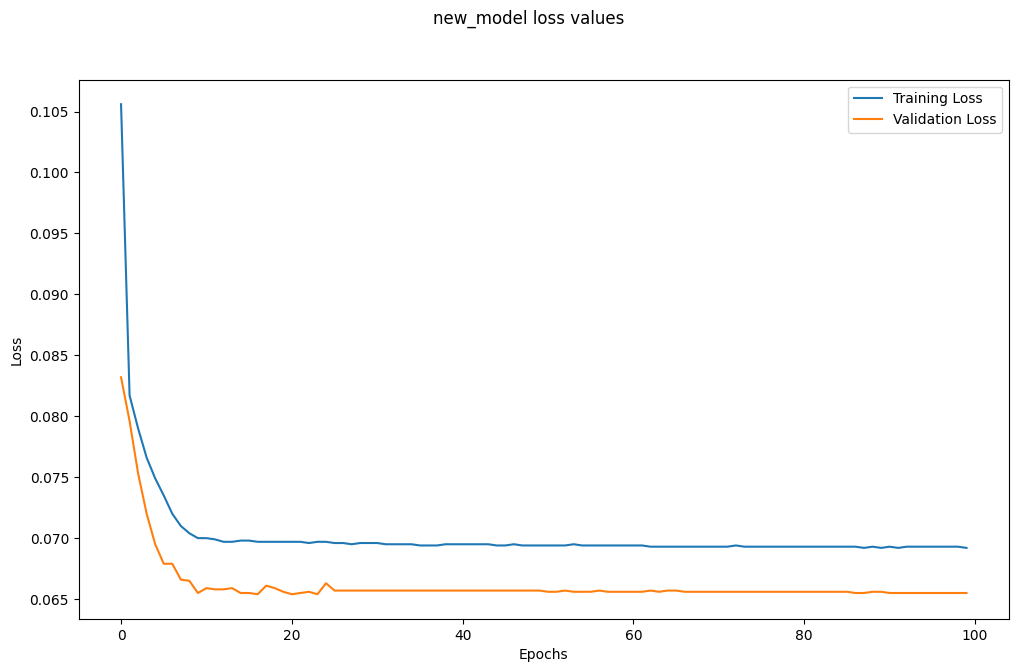

In [9]:
plot_loss(model_name, train_loss, valid_loss)

In [10]:
TRAINED_STATE_DICT_PATH = f'./trained_models/{model_name}_state_dict'

In [11]:
# Set the device & clean the memory.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: ", device)
torch.cuda.empty_cache()

Device:  cuda:0


In [12]:
# Load the trained model state dictionary.
model.load_state_dict(torch.load(TRAINED_STATE_DICT_PATH))

/tmp/ipykernel_42370/2031099296.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(TRAINED_STATE_DICT_PATH))


<All keys matched successfully>

In [17]:
# Pre - normalization min and max values.
x_load_min = 53.31
x_load_max = 999049.0
y_load_min = 101.93
y_load_max = 998309.0

In [24]:
# Evaluate the model.
for batch_features, batch_labels in test_dataloader:
    outputs = model(batch_features)
    predicted_labels = outputs.detach().numpy()

    for i in range(len(batch_features)):
        features = batch_features[i]
        labels = batch_labels[i]
        predicted = predicted_labels[i]

        print("Features:")
        print(features)

        print("Predicted Labels:")
        # Scale the predictions and ground truth labels back to nominal range.
        x_load_pred = predicted[0] * (x_load_max - x_load_min) + x_load_min
        y_load_pred = predicted[1] * (y_load_max - y_load_min) + y_load_min
        print("Predicted X Load:,", x_load_pred)
        print("Predicted Y Load:,", y_load_pred)

        print("Actual Labels:")
        x_load_actual = labels.numpy()[0] * (x_load_max - x_load_min) + x_load_min
        y_load_actual = labels.numpy()[1] * (y_load_max - y_load_min) + y_load_min
        print("Actual X Load:,", x_load_actual)
        print("Actual Y Load:,", y_load_actual)

        print("------------------")

Features:
tensor([0.5000, 0.8000, 1.5000])
Predicted Labels:
Predicted X Load:, 229697.77006780385
Predicted Y Load:, 425196.6849012693
Actual Labels:
Actual X Load:, 1071.7800216243904
Actual Y Load:, 395793.00209836214
------------------
Features:
tensor([0.2000, 0.5000, 1.5000])
Predicted Labels:
Predicted X Load:, 593621.730352729
Predicted Y Load:, 374825.30097027833
Actual Labels:
Actual X Load:, 699615.0171973044
Actual Y Load:, 289855.9889860594
------------------
Features:
tensor([0.5000, 0.8000, 1.5000])
Predicted Labels:
Predicted X Load:, 229697.77006780385
Predicted Y Load:, 425196.6849012693
Actual Labels:
Actual X Load:, 1100.1199657903203
Actual Y Load:, 446795.0029764634
------------------
Features:
tensor([0.2000, 0.5000, 1.5000])
Predicted Labels:
Predicted X Load:, 593621.730352729
Predicted Y Load:, 374825.30097027833
Actual Labels:
Actual X Load:, 978063.9893133306
Actual Y Load:, 480177.9864066144
------------------
Features:
tensor([0.2000, 0.2000, 1.5000])
Pred

In [20]:
features

tensor([0.5000, 0.8000, 1.5000])

In [21]:
labels

tensor([0.0010, 0.3964])